In [1]:
import pandas as pd
import numpy as np
from time import time
import datetime
#import quandl as quandl
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape,Dropout,Activation,Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
#from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
#from tensorflow.python.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#-------------------------------------------------------------------------------------------------------------
# 1: 加载数据文件，查看数据信息
df = pd.read_csv('train.csv')
df.head() # broadband 即可：0-离开，1-留存
df_test = pd.read_csv('test.csv')

from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
# LabelEncoder
for col in tqdm_notebook(df.columns):
    if df[col].dtype == "object":
        encoder = LabelEncoder()
        encoder.fit(list(df[col].values) + list(df_test[col].values))
        df[col] = encoder.transform(list(df[col].values))
        df_test[col] = encoder.transform(list(df_test[col].values))
        
df = df.reset_index() # 重置索引
df_test = df_test.reset_index()
def clean_top_cols(df):
    new_cols = [col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > 1]
    return new_cols
df_cols = clean_top_cols(df)
df_test_clos = clean_top_cols(df_test)
cols_to_drop = list(set(df_cols + df_test_clos))
if 'bad_good' in cols_to_drop : # 查看标签列是否在其中
    cols_to_drop.remove('bad_good') # 删除标签列
#print("原始的train shape : ", df)
df = df.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)
#print("清理后的train shape : ", df.shape)

y1 = df['bad_good'] # 标签
X2 = df.iloc[:, 1:-1] # 客户 id 没有用，故丢弃 cust_id

C:\Users\HT\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\HT\AppData\Local\Temp/ipykernel_3756/4042676915.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for col in tqdm_notebook(df.columns):


  0%|          | 0/627 [00:00<?, ?it/s]

In [3]:
#x0 = df['Adj Close'].values
#len(x0)
len(X1)

285285

In [3]:
#m = max(x0)
#x0=x0/m
#x0[:10]
#n = len(x0)
#p =20
#x = np.array([x0[k:k+p] for k in range(n-p)])
X2.shape

(285285, 626)

In [4]:
#y =np.array(x0[p:])
y1.shape

(285285,)

In [3]:
#X = x[:-1]
X1 = np.expand_dims(X2, axis=2)
#X= np.reshape(X1,(626, 1))
X1.shape

(285285, 626, 1)

In [9]:
print(df_test[0:2])

   index     CUST_ID  OPEN_ORG_NUM  IDF_TYP_CD  GENDER  LAST_OPEN_TENURE_DAYS  \
0      0  1000000239          1101           0       0                      0   
1      1  1000003260           602           0       1                     10   

   G_OS_PRCP_SUM  OS_PRCP_SUM_THREE  OS_PRCP_SUM_SIX  guozhai_flag  ...  \
0           0.00            0.00000          0.00000             0  ...   
1       47466.73        46687.60333      23343.80167             0  ...   

   L3_CHANNEL_TXN_DTAIN_AVGCNT  L3_CHANNEL_TXN_DOUTTA_AVGCNT  \
0                            0                             0   
1                            0                             0   

   L6_CHANNEL_TXN_STAIN_AVGAMT  L6_CHANNEL_TXN_SOUTTA_AVGAMT  \
0                            0                             0   
1                            0                             0   

   L6_CHANNEL_TXN_DTAIN_AVGAMT  L6_CHANNEL_TXN_DOUTTA_AVGAMT  \
0                            0                             0   
1               

In [4]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1, y1,test_size=0.2,shuffle=False)
X_train,X_test,Y_train,Y_test = train_test_split(X_train1, Y_train1,test_size=0.3,shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(159759, 626, 1)
(68469, 626, 1)
(68469,)
(159759,)


In [28]:
model = Sequential()
model.add(Conv1D(1,1,padding='same',activation='relu',input_shape=(357,1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(357))
model.add(Dropout(0.2))
model.add(Activation('Relu'))
model.add(Dense(1))
model.add(Activation("sigmoid"))
#model.add(Activation("relu"))

#from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 626, 1)            2         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 313, 1)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 313)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 626)               196564    
_________________________________________________________________
dropout_1 (Dropout)          (None, 626)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 626)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [29]:
model.fit(X_train, Y_train, epochs=30, batch_size=300)

Epoch 1/30
533/533 [==============================] - 23s 39ms/step - loss: 21.8200 - accuracy: 0.9426
Epoch 2/30
533/533 [==============================] - 20s 38ms/step - loss: 19.7504 - accuracy: 0.9488
Epoch 3/30
533/533 [==============================] - 20s 38ms/step - loss: 17.7750 - accuracy: 0.9533
Epoch 4/30
533/533 [==============================] - 20s 38ms/step - loss: 14.3895 - accuracy: 0.9545
Epoch 5/30
533/533 [==============================] - 20s 38ms/step - loss: 14.2673 - accuracy: 0.9510
Epoch 6/30
533/533 [==============================] - 20s 38ms/step - loss: 14.2346 - accuracy: 0.9563
Epoch 7/30
533/533 [==============================] - 20s 37ms/step - loss: 11.1668 - accuracy: 0.9563
Epoch 8/30
533/533 [==============================] - 20s 37ms/step - loss: 12.0117 - accuracy: 0.9551
Epoch 9/30
533/533 [==============================] - 20s 38ms/step - loss: 9.4391 - accuracy: 0.9581
Epoch 10/30
533/533 [==============================] - 20s 37ms/step - los

In [ ]:
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape)) # stride = (2,2), padding = "same" , "valid"
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(2, (3, 3), strides = (2, 2), padding = "valid", activation='relu'))

# # 模型中添加最大池化层
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization()) # 可以加在各层中间

# # 模型中的数据矩阵展平
# model.add(Flatten())
# # 模型中添加全连接层
# model.add(Dense(128, activation='relu'))

# # 模型中添加dropout操作
# model.add(Dropout(0.5))
# # 模型中添加全连接层，且使用relu作为激活函数，即最终分类结果
# model.add(Dense(num_classes, activation='softmax'))

# model.summary()
# # 模型指定损失函数，优化器，评判指标
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer="sgd", # 
#               metrics=['accuracy'])

# # 调用模型对象的fit方法开始模型训练，fit方法需要4个参数，第1个参数是特征矩阵，第2个参数是预测目标值，第3个关键字参数batch_size，第4个关键字参数epochs
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [13]:
df_test.shape

(189766, 627)

In [14]:
print(df_test.shape)
df_test = df_test.drop(['CUST_ID'], axis=1)
df_test = np.expand_dims(df_test, axis=2)
print(df_test.shape)

(189766, 627)
(189766, 626, 1)


In [9]:
print(X_test1.shape)

(57057, 626, 1)


In [ ]:

df_test = df_test.drop(['CUST_ID'], axis=1)
df_test = np.expand_dims(df_test, axis=2)
print(df_test.shape)

In [8]:
sns.countplot(data=Y_test1)
plt.title("Good & Bad")
plt.show()

KeyError: 0

In [42]:
y_test_predict1 = model.predict(X_test1)


[[0.01053858]
 [0.03060663]
 [0.03060663]
 ...
 [0.03060663]
 [0.03060663]
 [0.03060663]]


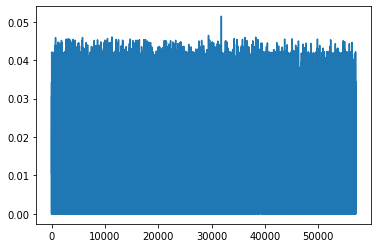

In [43]:
#plt.plot(y_test_predict1)
#plt.plot(Y_train[0:2000])
plt.plot(y_test_predict1)
#print(Y_test1.shape)
print(y_test_predict1)
#plt.plot(Y_train)
#print(y_predict[1:800])

In [39]:
print(Y_test)
y_predict_new = y_test_predict1.flatten()
#y_predict3 =pd.Series(y_predict)
#y_predict3 = y_predict.values.flatten()

159759    0
159760    0
159761    0
159762    0
159763    0
         ..
228223    0
228224    0
228225    0
228226    0
228227    0
Name: bad_good, Length: 68469, dtype: int64


In [38]:
y_predict_new.shape

(57057,)

In [14]:
#print(y_predict_new.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [40]:
#labels = np.round(y_predict_new)
#y_predict_new[y_predict_new>0.5] = 1
y_predict_new[y_predict_new<0.5] = 0
#labels2 = np.array(y_predict_new).value
dataframe = pd.DataFrame({'bad_good':y_predict_new})
dataframe.to_csv('result_cnn1.csv')
Y_test1.to_csv('result_cnn2.csv')


In [1]:
scores=model.evaluate( x=X_test1 , y=Y_test1)

NameError: name 'model' is not defined

In [41]:
from sklearn.metrics import roc_auc_score
import numpy as np
auc = roc_auc_score(y_predict_new, Y_test1)
print(auc)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [61]:
print(labels)

[0. 0. 0. ... 0. 0. 0.]


C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


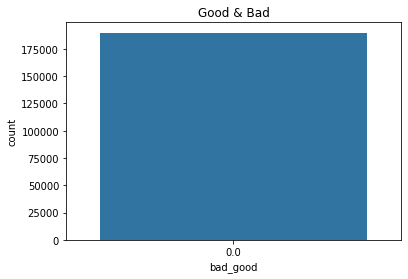

In [13]:
import seaborn as sns
sns.countplot('bad_good', data=dataframe)
plt.title("Good & Bad")
plt.show()

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
228228    0
228229    0
228230    0
228231    0
228232    0
         ..
285280    0
285281    0
285282    0
285283    0
285284    0
Name: bad_good, Length: 57057, dtype: int64
(57057, 1)
(57057,)
[0.]
0.999298934380258
57016


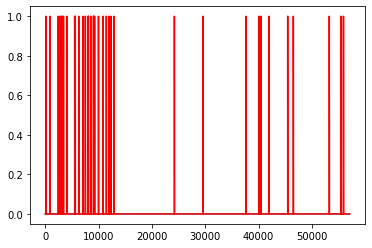

In [10]:

print(y_predict)
print(Y_test)
print(y_predict.shape)
print(Y_test.shape)
print(y_predict[0])
Y_test = np.array(Y_test,dtype="int")
Y_test = np.expand_dims(Y_test, axis=1)
plt.plot(y_predict)
plt.plot(Y_test,'r')
#plt.plot(y_predict,'r')
#ACC
error = 0
#summary = 0
for i in range(57056) :
    if (y_predict[i] == Y_test[i]) :
      error = error + 1
acc = error/57056
print(acc)
print(error)

In [11]:
y_predict1 = model.predict(df_test)
print(y_predict1)
print(df_test)
print(y_predict1.shape)
print(df_test.shape)
#print(y_predict[0])
df_test = np.array(df_test,dtype="int")
df_test = np.expand_dims(df_test, axis=1)
#plt.plot(y_predict1)
#plt.plot(Y_test,'r')
#plt.plot(y_predict,'r')
#ACC
error = 0
#summary = 0
for i in range(57056) :
    if (y_predict1[i] == df_test[i]) :
      error = error + 1
acc = error/57056
print(acc)
print(error)

ValueError: in user code:

    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\HT\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: (None, 358)


In [ ]:
df_test.shape
df_test.head()

,index,CUST_ID,OPEN_ORG_NUM,GENDER,LAST_OPEN_TENURE_DAYS,L3_DR_AMT,L3_DR_CNT,DR_AMT,DR_CNT,L3_CR_AMT,...,CHANNEL_AUTO_DOUTTA_AMT,CHANNEL_AUTO_DOUTTA_CNT,L3_CHANNEL_AUTO_DTAIN_AVGAMT,L3_CHANNEL_AUTO_DOUTTA_AVGAMT,L3_CHANNEL_AUTO_DTAIN_AVGCNT,L3_CHANNEL_AUTO_DOUTTA_AVGCNT,L6_CHANNEL_AUTO_DTAIN_AVGAMT,L6_CHANNEL_AUTO_DOUTTA_AVGAMT,L6_CHANNEL_AUTO_DTAIN_AVGCNT,L6_CHANNEL_AUTO_DOUTTA_AVGCNT
0,0,1000000239,1101,0,0,0.00,0,0.0,0,0.00,...,0.0,0,766.666667,0.000000,0.666667,0.000000,1016.666667,0.0,0.5,0.0
1,1,1000003260,602,1,10,797929.58,7,181398.1,3,782289.02,...,3000.0,1,0.000000,3333.333333,0.000000,1.666667,0.000000,2500.0,0.0,1.5
2,2,1000003414,606,1,0,0.00,0,0.0,0,0.00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3,1000004746,602,1,33,0.00,0,0.0,0,0.00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,4,1000005243,602,0,0,0.00,0,0.0,0,0.00,...,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
